In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)


/Users/abhishekbiswas/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('train_jh.csv')
train.head()
test = pd.read_csv('test_jh.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_0                       21000 non-null  int64
 7   PAY_2                       21000 non-null  int64
 8   PAY_3                       21000 non-null  int64
 9   PAY_4                       21000 non-null  int64
 10  PAY_5                       21000 non-null  int64
 11  PAY_6                       21000 non-null  int64
 12  BILL_AMT1                   21000 non-null  int64
 13  BILL_AMT2                   21000 non-null  int64
 14  BILL_A

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         9000 non-null   int64
 1   LIMIT_BAL  9000 non-null   int64
 2   SEX        9000 non-null   int64
 3   EDUCATION  9000 non-null   int64
 4   MARRIAGE   9000 non-null   int64
 5   AGE        9000 non-null   int64
 6   PAY_0      9000 non-null   int64
 7   PAY_2      9000 non-null   int64
 8   PAY_3      9000 non-null   int64
 9   PAY_4      9000 non-null   int64
 10  PAY_5      9000 non-null   int64
 11  PAY_6      9000 non-null   int64
 12  BILL_AMT1  9000 non-null   int64
 13  BILL_AMT2  9000 non-null   int64
 14  BILL_AMT3  9000 non-null   int64
 15  BILL_AMT4  9000 non-null   int64
 16  BILL_AMT5  9000 non-null   int64
 17  BILL_AMT6  9000 non-null   int64
 18  PAY_AMT1   9000 non-null   int64
 19  PAY_AMT2   9000 non-null   int64
 20  PAY_AMT3   9000 non-null   int64
 21  PAY_AMT4   900

In [5]:
train.describe(include = 'all')

ID      LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  21000.000000   21000.000000  21000.000000  21000.000000  21000.000000   
mean   14949.183667  167214.746667      1.607571      1.854190      1.551714   
std     8632.775153  128965.188482      0.488303      0.791628      0.521176   
min        1.000000   10000.000000      1.000000      0.000000      0.000000   
25%     7508.750000   50000.000000      1.000000      1.000000      1.000000   
50%    14939.500000  140000.000000      2.000000      2.000000      2.000000   
75%    22386.750000  240000.000000      2.000000      2.000000      2.000000   
max    29998.000000  800000.000000      2.000000      6.000000      3.000000   

                AGE        PAY_0         PAY_2         PAY_3        PAY_4  \
count  21000.000000  21000.00000  21000.000000  21000.000000  21000.00000   
mean      35.461619     -0.01119     -0.127238     -0.164857     -0.21819   
std        9.206628      1.12321      1.198957      1.198624      1.17221   
min       21.000000     -2.00000     -2.000000     -2.000000     -2.00000   
25%       28.000000     -1.00000     -1.000000     -1.000000     -1.00000   
50%       34.000000      0.00000      0.000000      0.000000      0.00000   
75%       41.000000      0.00000      0.000000      0.000000      0.00000   
max       75.000000      8.00000      8.000000      8.000000      8.00000   

              PAY_5         PAY_6      BILL_AMT1      BILL_AMT2     BILL_AMT3  \
count  21000.000000  21000.000000   21000.000000   21000.000000  2.100000e+04   
mean      -0.260952     -0.288667   51501.542381   49463.502667  4.723258e+04   
std        1.141454      1.151592   73453.641859   70866.586004  6.953988e+04   
min       -2.000000     -2.000000  -14386.000000  -69777.000000 -1.572640e+05   
25%       -1.000000     -1.000000    3564.750000    3000.000000  2.686250e+03   
50%        0.000000      0.000000   22578.000000   21550.000000  2.024200e+04   
75%        0.000000      0.000000   67876.250000   64918.250000  6.082675e+04   
max        8.000000      8.000000  746814.000000  743970.000000  1.664089e+06   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count   21000.000000   21000.000000   21000.000000   21000.000000   
mean    43387.372476   40398.551095   38931.194000    5686.349333   
std     64081.073110   60396.811177   59196.499234   16868.075695   
min   -170000.000000  -81334.000000 -209051.000000       0.000000   
25%      2332.000000    1759.000000    1242.750000     998.250000   
50%     19158.500000   18266.500000   17203.500000    2100.000000   
75%     55376.750000   50517.250000   49463.000000    5023.250000   
max    706864.000000  587067.000000  699944.000000  873552.000000   

           PAY_AMT2       PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  2.100000e+04   21000.000000   21000.000000   21000.000000   
mean   5.923003e+03    5202.325333    4793.172000    4797.012952   
std    2.390953e+04   17006.416467   15467.403159   15270.031988   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    8.360000e+02     390.000000     284.000000     241.000000   
50%    2.011000e+03    1811.500000    1500.000000    1500.000000   
75%    5.000000e+03    4500.000000    4002.250000    4051.000000   
max    1.684259e+06  889043.000000  621000.000000  417990.000000   

            PAY_AMT6  default_payment_next_month  
count   21000.000000                21000.000000  
mean     5211.736762                    0.221190  
std     17698.795697                    0.415058  
min         0.000000                    0.000000  
25%       102.000000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000

In [6]:
train.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

In [7]:
train['AGE'].value_counts()

29    1088
27    1052
28     993
30     972
26     879
25     847
32     832
31     825
34     821
33     815
36     786
35     784
24     779
37     738
38     661
39     660
23     646
40     602
41     596
42     550
44     487
43     470
45     429
46     412
22     404
47     331
48     330
49     315
50     268
51     243
53     223
52     207
54     175
55     136
56     124
58      88
57      85
59      63
60      51
21      45
61      40
63      27
62      26
66      18
64      17
65      16
67      11
69      11
70       8
71       3
68       3
75       3
72       2
73       2
74       1
Name: AGE, dtype: int64

In [8]:
import pandas_profiling as pp


In [9]:
pp.ProfileReport(train)

In [10]:
train.head(10)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0  25150     360000    2          2         2   25     -1     -1     -1   
1  13470     240000    2          1         2   46      2      2     -2   
2   3092     320000    2          2         1   41      0      0      0   
3  13973      50000    2          2         2   24     -1     -1     -2   
4  10567      80000    1          3         1   52     -1      0      0   
5  28050     150000    2          1         2   29     -2     -2     -2   
6  23327     260000    2          1         1   36      0      0      0   
7  10728      50000    2          2         1   31      0      0      0   
8  17227     130000    2          2         2   24      0      0      0   
9  22039      60000    2          3         2   28     -1     -1      0   

   PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -1     -1     -1      20952      12590       3479       3435       8870   
1     -1      0     -1        456          0          0       2240       1681   
2      0      0      0      49846      53811      38717      35409      35036   
3     -2     -2     -2       2675          0          0          0          0   
4      0      0      0      35861      18521      19385      20561      21261   
5     -2     -2     -1          0       5067        131        987          0   
6      0      0     -1     122825      88273      91908      90857     -81334   
7      0      0      0      13641      15409      16052      15993      15780   
8      0      0      0     121720     115630     115939     109428      90359   
9      0      0      0        396      43902      44802      42984      38495   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0       2020     12590      3479      3446      8870      2020     27043   
1       2267         0         0      2240         0      2267      3074   
2      35939      5000      2000      2000      3000      3000      1500   
3          0         0         0         0         0         0         0   
4      21457      1500      1500      1500      1028       876      1449   
5      14001      5067       131       987       400     14001         0   
6     142645      5000      6000      5020     81569    331788     10002   
7      15549      2000      1223      1000      1000      1000      1000   
8      89216      4155      5802      3487      2908      3013      3093   
9      39038     87804      2000      1567      1320      1500      2000   

   default_payment_next_month  
0                           0  
1                           0  
2                           0  
3                           1  
4                           0  
5                           1  
6                           0  
7                           0  
8                           0  
9                           0

In [11]:
train['SEX'].value_counts()

2    12759
1     8241
Name: SEX, dtype: int64

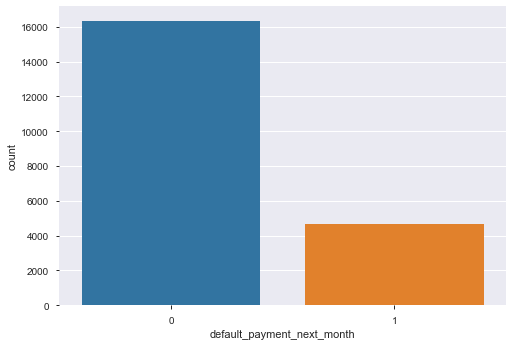

In [12]:
# distribution of target variable in the target column

sns.countplot(train['default_payment_next_month'])


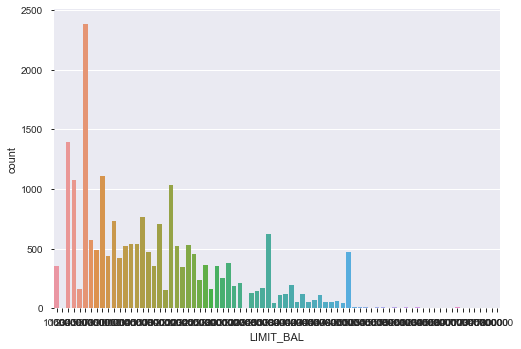

In [13]:
sns.countplot(train['LIMIT_BAL'])
fig_dims = (10, 8)


In [14]:
train['BILL_AMT1'].value_counts()

0        1406
390       162
780        59
326        45
2500       45
         ... 
7338        1
1193        1
51499       1
14670       1
4094        1
Name: BILL_AMT1, Length: 16700, dtype: int64

In [15]:
import joypy
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 12)

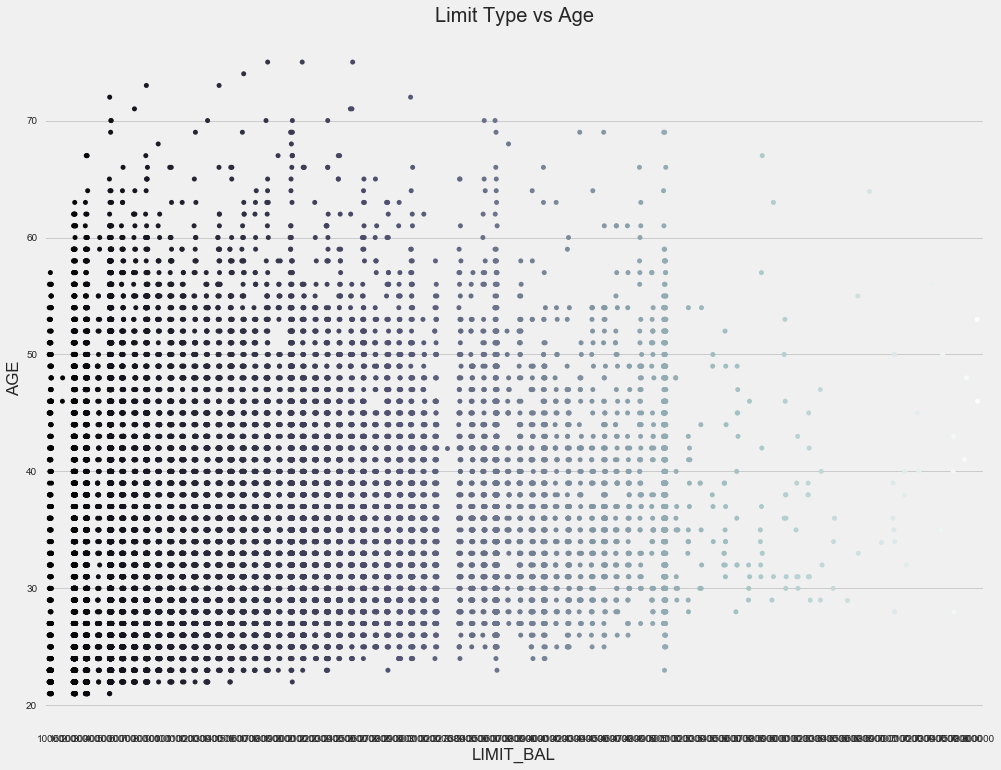

In [16]:
sns.stripplot(train['LIMIT_BAL'], train['AGE'], palette = 'bone')
plt.title('Limit Type vs Age', fontsize = 20)
plt.show()

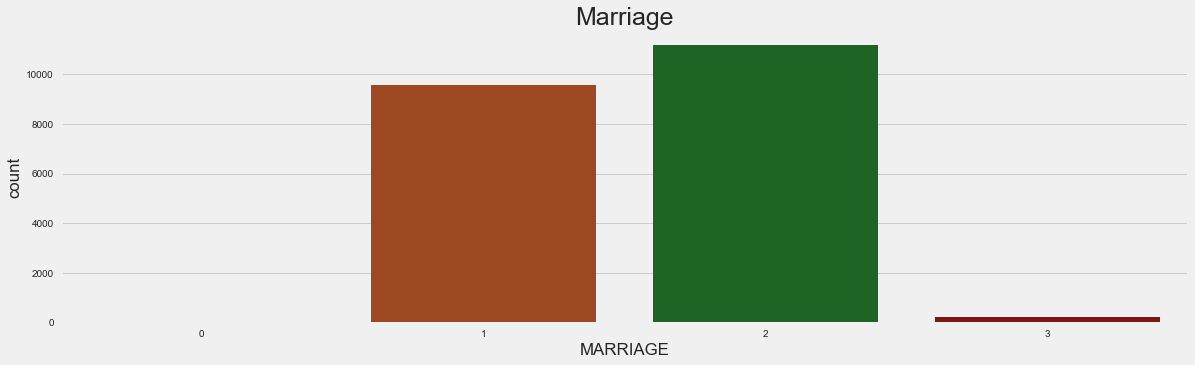

In [17]:
plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(train['MARRIAGE'], palette = 'dark')
plt.title('Marriage', fontsize = 25)
plt.show()


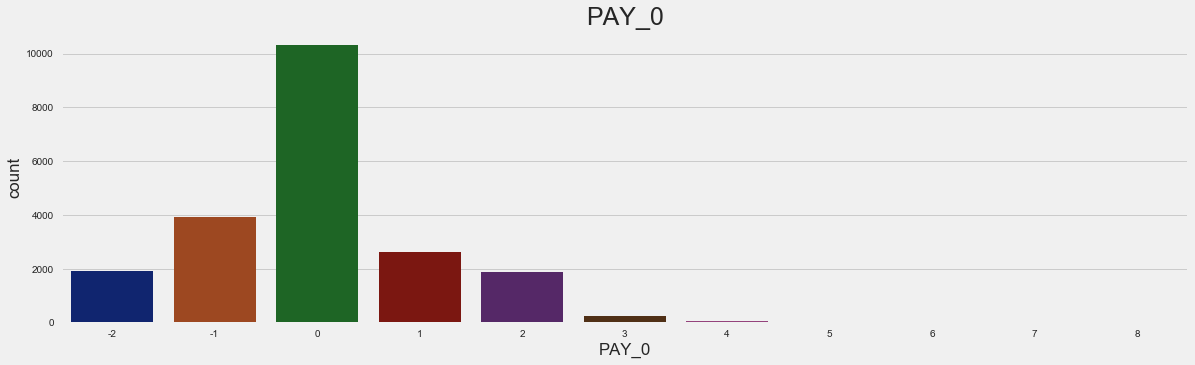

In [18]:
plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(train['PAY_0'], palette = 'dark')
plt.title('PAY_0', fontsize = 25)
plt.show()


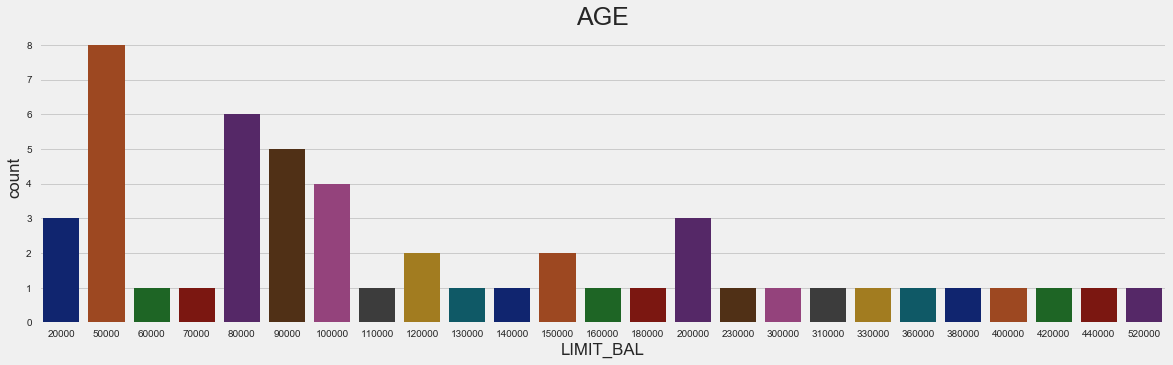

In [19]:
plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(train['LIMIT_BAL'].tail(50), palette = 'dark')
plt.title('AGE', fontsize = 25)
plt.show()


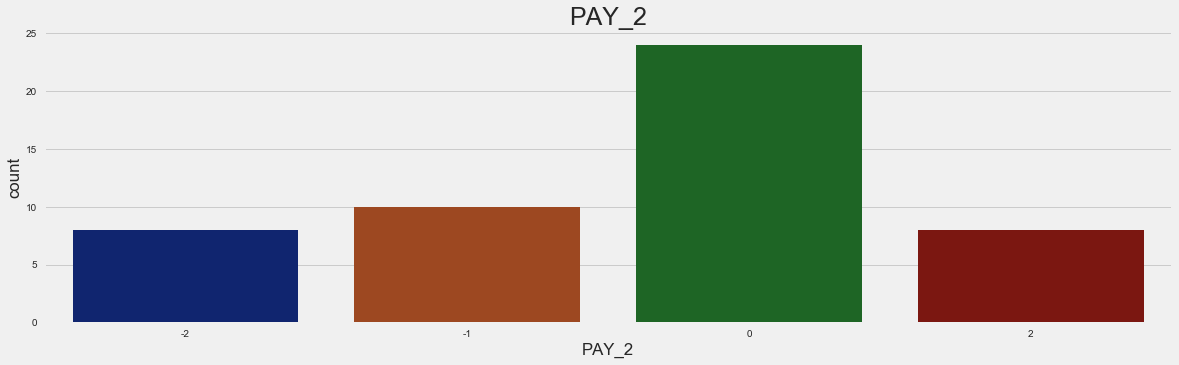

In [20]:
plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(train['PAY_2'].tail(50), palette = 'dark')
plt.title('PAY_2', fontsize = 25)
plt.show()

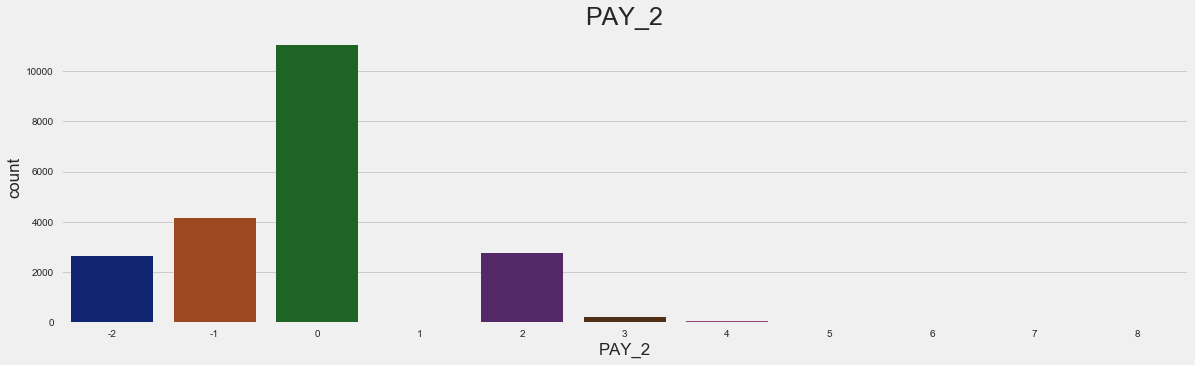

In [21]:
plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(train['PAY_2'], palette = 'dark')
plt.title('PAY_2', fontsize = 25)
plt.show()

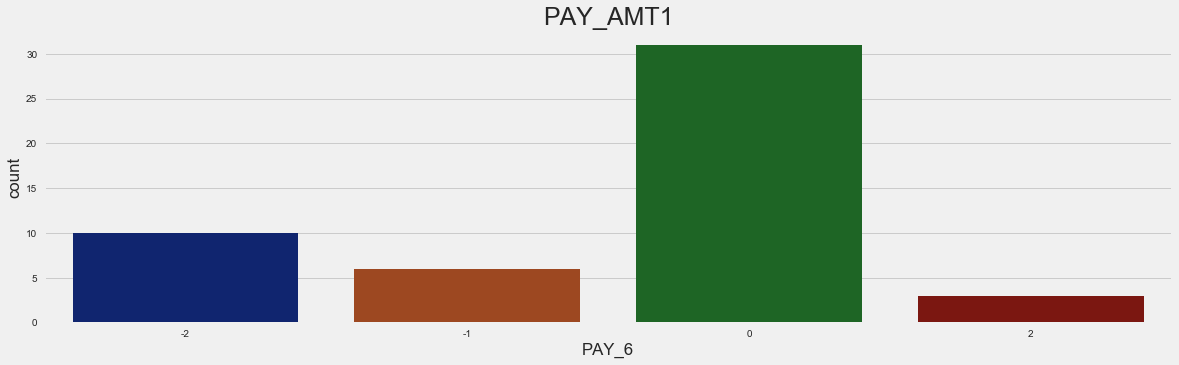

In [22]:
plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(train['PAY_6'].tail(50), palette = 'dark')
plt.title('PAY_AMT1', fontsize = 25)
plt.show()

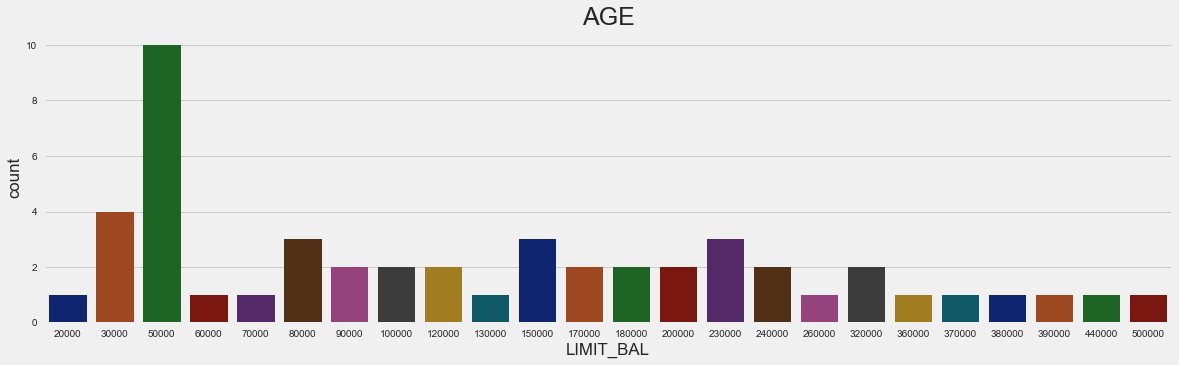

In [23]:
plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(train['LIMIT_BAL'].head(50), palette = 'dark')
plt.title('AGE', fontsize = 25)
plt.show()


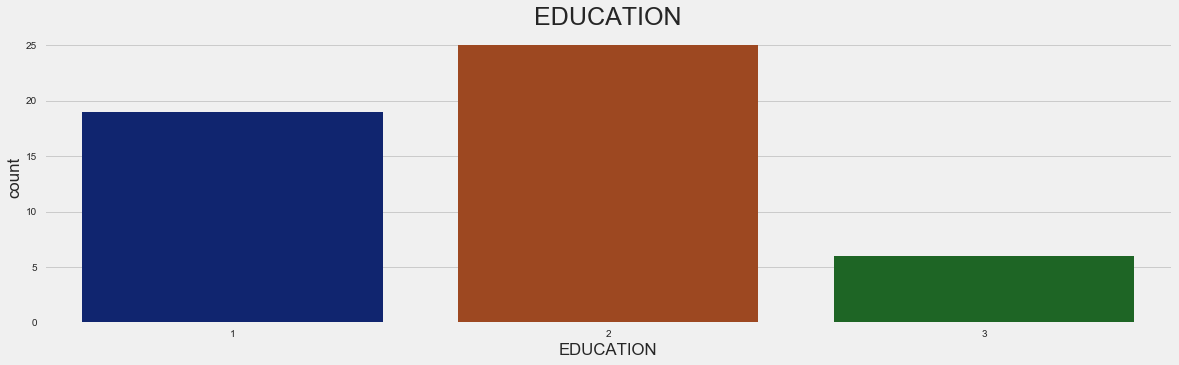

In [24]:
plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(train['EDUCATION'].tail(50), palette = 'dark')
plt.title('EDUCATION', fontsize = 25)
plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

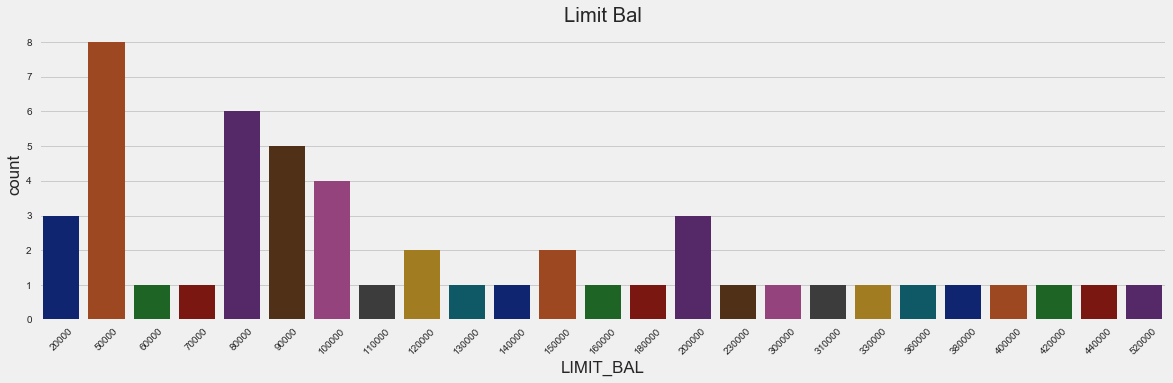

In [25]:
# plotting countplot for limit of users of users

plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(train['LIMIT_BAL'].tail(50), palette = 'dark')
plt.title('Limit Bal')
plt.xticks(rotation = 45)

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_0                       21000 non-null  int64
 7   PAY_2                       21000 non-null  int64
 8   PAY_3                       21000 non-null  int64
 9   PAY_4                       21000 non-null  int64
 10  PAY_5                       21000 non-null  int64
 11  PAY_6                       21000 non-null  int64
 12  BILL_AMT1                   21000 non-null  int64
 13  BILL_AMT2                   21000 non-null  int64
 14  BILL_A

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

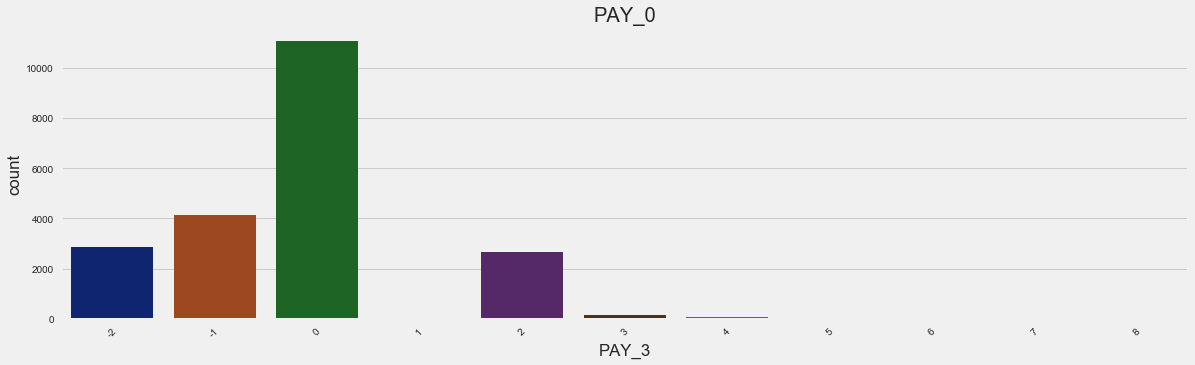

In [27]:
# plotting countplot for credit history of users

plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(train['PAY_3'], palette = 'dark')
plt.title('PAY_0')
plt.xticks(rotation = 45)

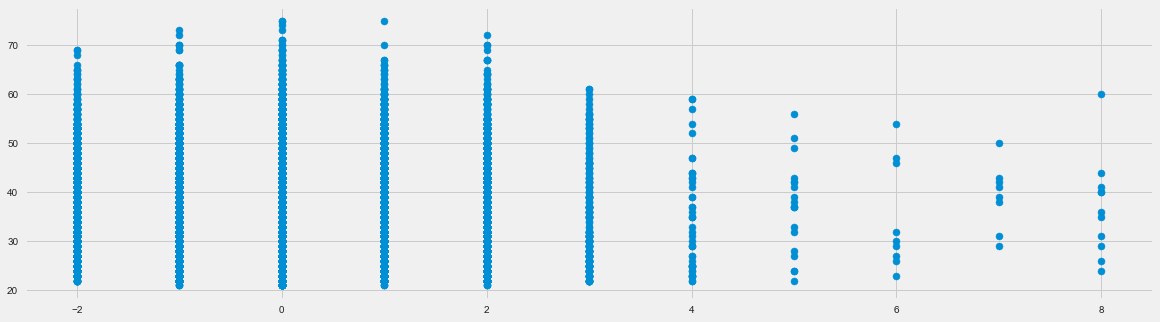

In [28]:
#scatter plot for the varible
plt.rcParams['figure.figsize'] = (18, 5)
x = train['PAY_0']
y = train['AGE']
plt.scatter(x, y)
plt.show()

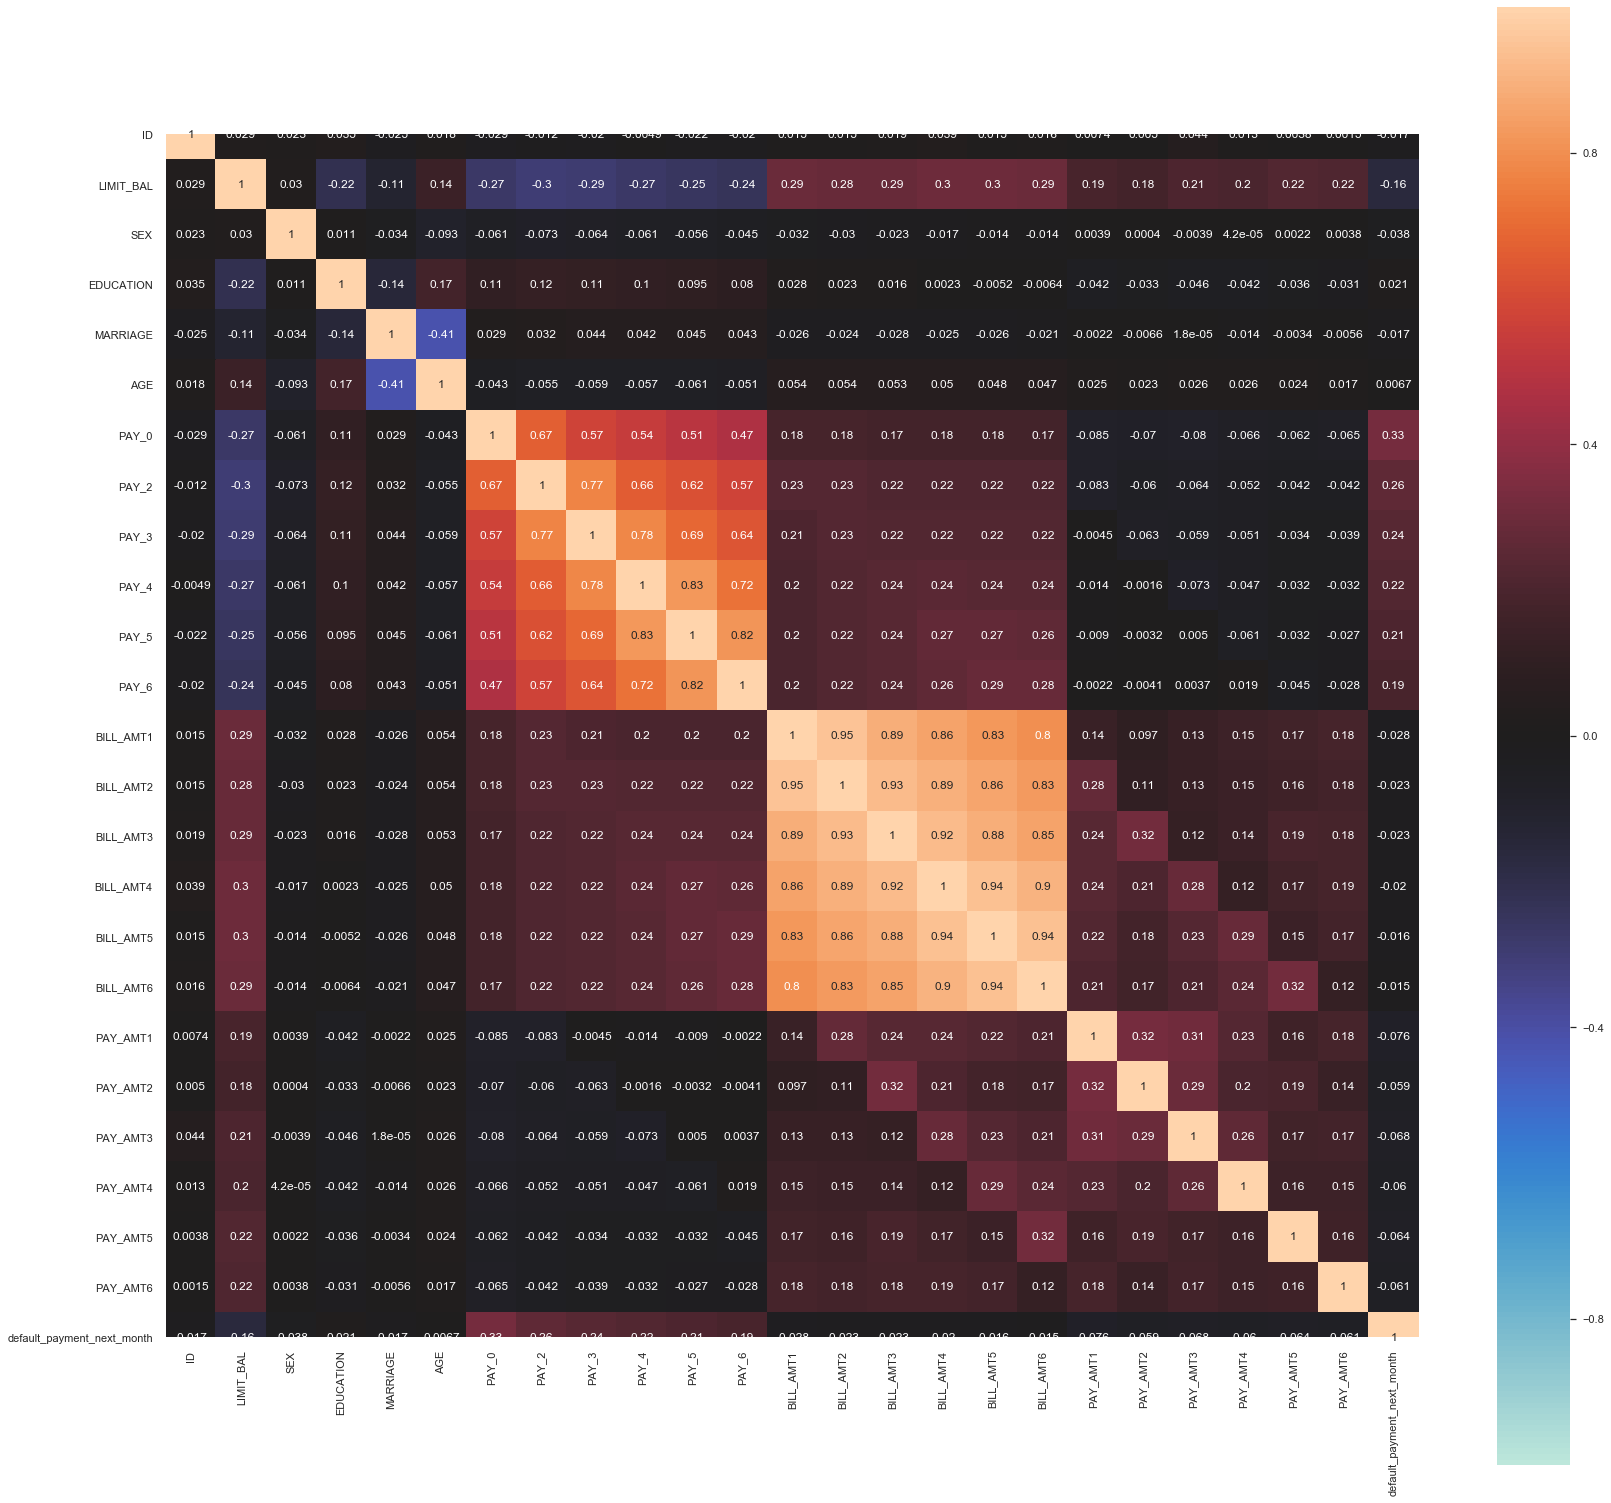

In [29]:
import seaborn as sns; sns.set()
plt.figure(figsize=(25, 25))
ax = sns.heatmap(train.corr(), vmin=-1, vmax=1, center=0, annot=True, square=True)

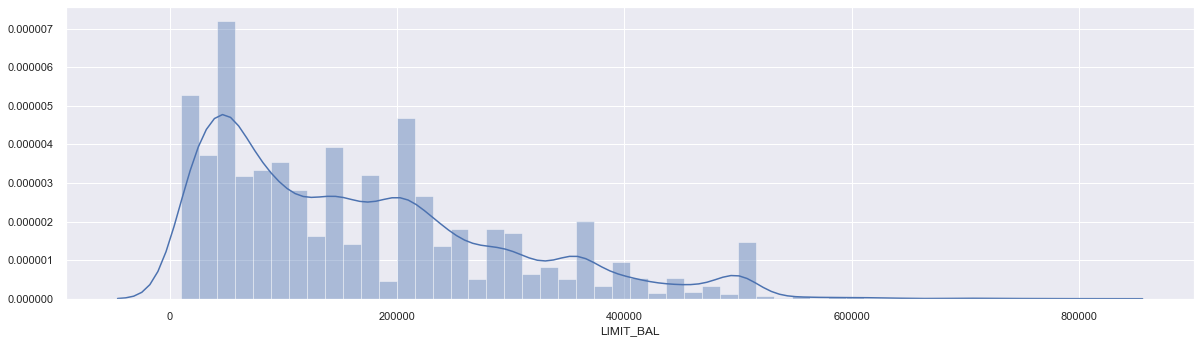

In [30]:
# LIMIT_BAL Amount of given credit (NT dollars)
ax = sns.distplot(train['LIMIT_BAL'])
ax.autoscale()
plt.show()

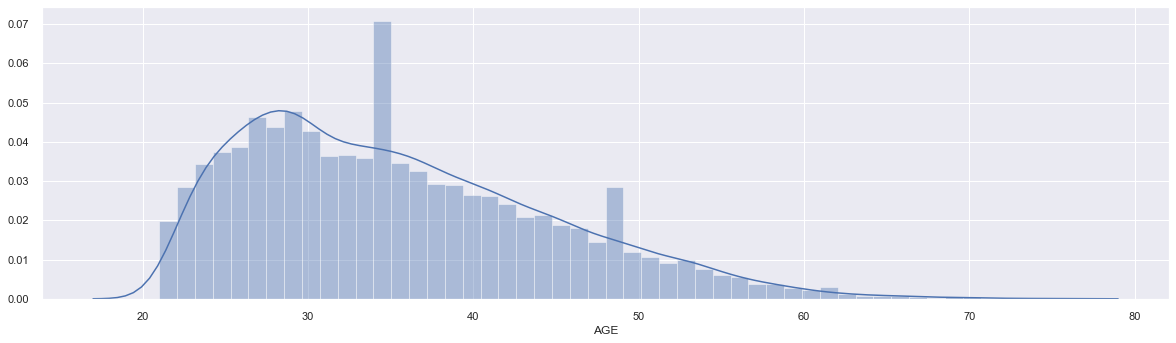

In [31]:
ax = sns.distplot(train['AGE'])
ax.autoscale()
plt.show()

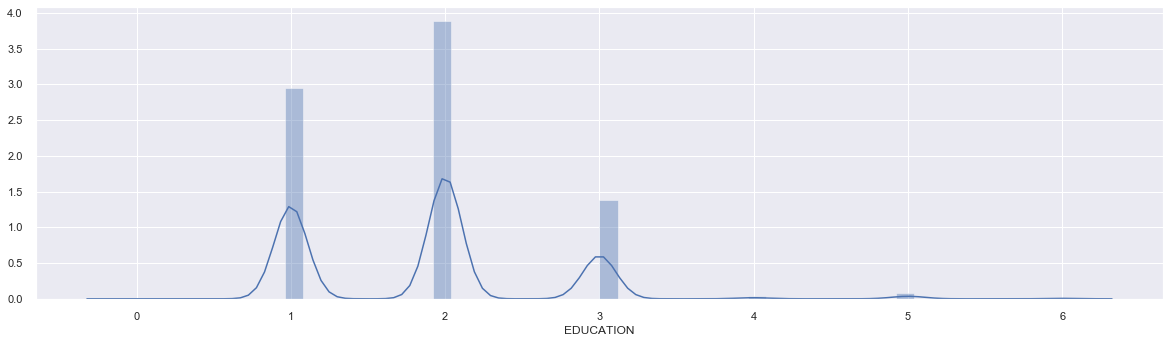

In [32]:
# EDUCATION (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
ax = sns.distplot(train['EDUCATION'])
ax.autoscale()
plt.show()

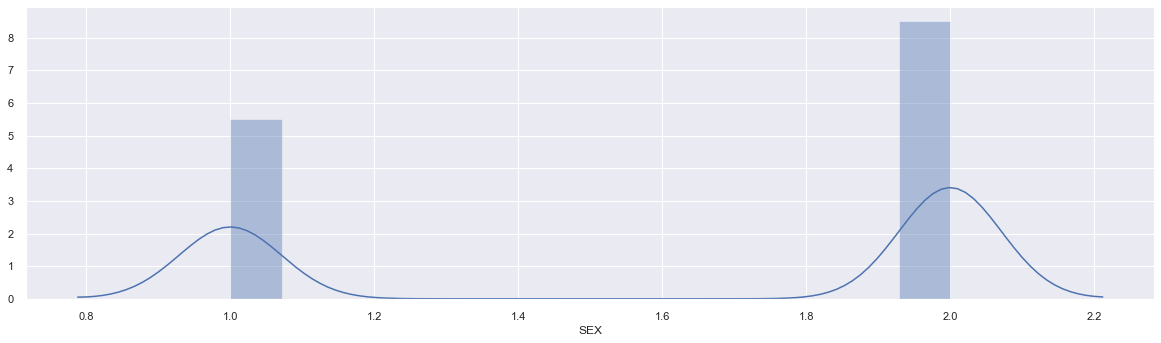

In [33]:
# SEX (1= MALE, 2= FEMALE)
ax = sns.distplot(train['SEX'])
ax.autoscale()
plt.show()

In [34]:
train['PAY_2'].value_counts()

 0    11043
-1     4174
 2     2776
-2     2643
 3      229
 4       69
 1       23
 5       21
 7       11
 6       10
 8        1
Name: PAY_2, dtype: int64

In [35]:
# splitting the data for train and test
x_train = train.iloc[:21000,:]
x_test = train.iloc[21000:,:]

# checking the shape of train and test
print("Shape of train :", x_train.shape)
print("Shape of test :", x_test.shape)

Shape of train : (21000, 25)
Shape of test : (0, 25)


In [36]:
x = train
y = train[['default_payment_next_month']]

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(15750, 25)
(5250, 25)
(15750, 1)
(5250, 1)


In [38]:
# find correlations to target
corr_matrix = train.corr().abs()
print(corr_matrix['default_payment_next_month'].sort_values(ascending=False).head(10))

default_payment_next_month    1.000000
PAY_0                         0.325851
PAY_2                         0.263546
PAY_3                         0.235930
PAY_4                         0.220079
PAY_5                         0.208783
PAY_6                         0.188985
LIMIT_BAL                     0.159163
PAY_AMT1                      0.076042
PAY_AMT3                      0.067720
Name: default_payment_next_month, dtype: float64
